In [1]:
import pandas as pd
import numpy as np

In [2]:
#The statespace
states = ["Performing","Watch","Substandard","Doubtful","Loss"]

#Possible sequences of events
transitionName = [["PP","PW","PS","PD","PL"],["WW","WP","WS","WD","WL"],["SP","SW","SS","SD","SL"],["DP","DW","DS","DD","DL"],["LP","LW","LS","LD","LL"]]

#Probabilities Matrix (transition matrix)
transitionMatrix = [[0.66,0.34,0,0,0],[0,0.74,0.26,0,0],[0,0,0.99,0.01,0],[0,0,0,0.996,0.004],[0,0,0,0,1]]


In [3]:
#Probability check - sum of each matrix = 1

if sum(transitionMatrix[0])+ sum(transitionMatrix[1]) + sum(transitionMatrix[2]) + sum(transitionMatrix[3]) + sum(transitionMatrix[4]) != 5:
    print("Probability Sum of each transition Matrix should be equal to 1. Something is wrong!")
else: 
    print("Probality sum of each transition matrix is 1")

Probality sum of each transition matrix is 1


In [4]:
#A function that implements the Markov Model to predict the transition change in probabilities
def transition_forecast(months):
    #Starting transition state for each loan
    transitionStatus = "Performing"
    
    #To store the number of state transitions taken to achieve the desired
    transitionList = [transitionStatus]
    i = 0
    
    #To store the compounded probability from the state transitions to be taken
    prob = 1
    
    while i != months:
        if transitionStatus == "Performing":
            change = np.random.choice(transitionName[0],replace=True,p = transitionMatrix[0])
            if change == "PP":
                prob = prob * 0.66
                transitionList.append("Performing")
                pass
            elif change == "PW":
                prob = prob * 0.34
                transitionStatus = "Watch"
                transitionList.append("Watch")
            elif change == "PS":
                prob = prob * 1
                transitionStatus = "Substandard"
                transitionList.append("Substandard")
            elif change == "PD":
                prob = prob * 1
                transitionStatus = "Doubtful"
                transitionList.append("Doubtful")
            else:
                prob = prob * 1
                transitionStatus = "Loss"
                transitionList.append("Loss")
        elif transitionStatus == "Watch":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "WW":
                prob = prob * 0.74
                transitionList.append("Watch")
                pass
            elif change == "WP":
                prob = prob * 1
                transitionStatus = "Performing"
                transitionList.append("Performing")
            elif change == "WS":
                prob = prob * 0.26
                transitionStatus = "Substandard"
                transitionList.append("Substandard")
            elif change == "WD":
                prob = prob * 1
                transitionStatus = "Doubtful"
                transitionList.append("Doubtful")
            else:
                prob = prob * 1
                transitionStatus = "Loss"
                transitionList.append("Loss")
        elif transitionStatus == "Substandard":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "SS":
                prob = prob * 0.99
                transitionList.append("Substandard")
                pass
            elif change == "SP":
                prob = prob * 1
                transitionStatus = "Performing"
                transitionList.append("Performing")
            elif change == "SW":
                prob = prob * 1
                transitionStatus = "Watch"
                transitionList.append("Watch")
            elif change == "SD":
                prob = prob * 0.01
                transitionStatus = "Doubtful"
                transitionList.append("Doubtful")
            else:
                prob = prob * 1
                transitionStatus = "Loss"
                transitionList("Loss")
        elif transitionStatus == "Doubtful":
            change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
            if change == "DD":
                prob = prob * 0.966
                transitionList.append("Doubtful")
                pass
            elif change == "DP":
                prob = prob * 1
                transitionStatus = "Performing"
                transitionList.append("Performing")
            elif change == "DW":
                prob = prob * 1
                transitionStatus = "Watch"
                transitionList.append("Watch")
            else:
                prob = prob * 0.004
                transitionStatus = "Loss"
                transitionList.append("Loss")
        else:
            change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
            if change == "LL":
                prob = prob * 1
                transitionList.append("Loss")
                pass
            elif change == "LP":
                prob = prob * 1
                transitionStatus = "Performing"
                transitionList.append("Performing")
            elif change == "LW":
                prob = prob * 1
                transitionStatus = "Watch"
                transitionList.append("Watch")
            elif change == "LS":
                prob = prob * 1
                transitionStatus = "Substandard"
                transitionList.append("Substandard")
            else:
                prob = prob * 1
                transitionStatus = "Loss"
                transitionList.append("Loss")
        i += 1
    print("Loan Repayment State Transitions: ", transitionList)
    print("End Loan Repayment State after " + str(months) + " months: " +transitionStatus)
    print("Transition probability between loan repayment states: "+ str(prob))
    
    return prob

In [5]:
loan_period = input("Enter the loan period whose loan payment risk you would like to compute or predict: ")

Enter the loan period whose loan payment risk you would like to compute or predict: 4


In [6]:
loan_period

'4'

In [7]:
loan_period = int(loan_period)

In [8]:
loan_period

4

In [9]:
prob = transition_forecast(loan_period)

Loan Repayment State Transitions:  ['Performing', 'Performing', 'Performing', 'Performing', 'Watch']
End Loan Repayment State after 4 months: Watch
Transition probability between loan repayment states: 0.09774864000000001


In [10]:
prob

0.09774864000000001

In [11]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd

In [12]:
loan_data = pd.read_excel('Loans_Final.xlsx')

In [13]:
loan_data.head(5).T

,0,1,2,3,4
Acct_No,45799,46422,46473,46822,47115
Product_id,Agriculture Loans,Agriculture Loans,Agriculture Loans,Agriculture Loans,Agriculture Loans
Branch,Namutumba,Namutumba,Namutumba,Namutumba,Namutumba
Loan_Status,outstanding,outstanding,outstanding,outstanding,outstanding
created_by,Joseph Menya,Joseph Menya,Atworekire Jimmy,Joseph Menya,Ben Godfrey Kiiza
Effective_date,2022-06-02 13:13:54,2022-07-20 11:08:33,2022-07-21 11:34:52,2022-08-16 13:57:40,2022-08-30 17:09:43
Customer_No,90001630,90001835,90002102,90001970,90001462
Currency,UGX,UGX,UGX,UGX,UGX
Customer_Name,SYLIVIA SABANO,GODFREY PATRICK GALYAKI,ANDREW NGAI,MUSA MAKONZI,ANNA AKELLO
maturity_Date,2023-03-31 00:00:00,2023-05-20 00:00:00,2023-01-18 00:00:00,2023-06-14 00:00:00,2023-02-18 00:00:00


In [14]:
loan_data.dtypes.value_counts()

object            12
int64              5
float64            5
datetime64[ns]     2
dtype: int64

In [15]:
loan_data = loan_data.drop([ 'Currency','Customer_Name','maturity_Date','Disbrsmnt_Setlmnt_Acct_No','Effective_date','Acct_No','Loan_Status','Term_code','Guarantor_1','Guarantor_2'], axis=1)

In [16]:
loan_data.dtypes.value_counts()

object     5
float64    5
int64      4
dtype: int64

In [17]:
loan_data.shape

(4212, 14)

In [18]:
loan_data.shape[1]

14

In [19]:
categorical_cols = loan_data.columns[loan_data.dtypes == object]
categorical_cols

Index(['Product_id', 'Branch', 'created_by', 'Int_ Type', 'Repayment_Freq_Cd'], dtype='object')

In [20]:
loan_data[categorical_cols]

,Product_id,Branch,created_by,Int_ Type,Repayment_Freq_Cd
0,Agriculture Loans,Namutumba,Joseph Menya,Flat,Monthly
1,Agriculture Loans,Namutumba,Joseph Menya,Flat,Monthly
2,Agriculture Loans,Namutumba,Atworekire Jimmy,Flat,Monthly
3,Agriculture Loans,Namutumba,Joseph Menya,Flat,Monthly
4,Agriculture Loans,Namutumba,Ben Godfrey Kiiza,Flat,Weekly
...,...,...,...,...,...
4207,Agriculture Loans,Seeta,James Nowembabazi,Flat,monthly
4208,Agriculture Loans,Seeta,Ivan Waiswa,Flat,monthly
4209,Agriculture Loans,Seeta,Stuat Beshumbusha,Flat,monthly
4210,Agriculture Loans,Seeta,Ivan Waiswa,Flat,monthly


In [21]:
num_ohe_cols = (loan_data[categorical_cols]
               .apply(lambda x: x.nunique())
               .sort_values(ascending=False))
num_ohe_cols

created_by           38
Branch                8
Repayment_Freq_Cd     6
Int_ Type             2
Product_id            1
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohc = OneHotEncoder()

ldt = loan_data.copy()

for col in categorical_cols:
    
    ldt_ohc = le.fit_transform(ldt[col]).astype(int)
    
    ldt = ldt.drop(col, axis=1)
    
    new_dat = ohc.fit_transform(ldt_ohc.reshape(-1,1))
    
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    
    new_df = pd.DataFrame(new_dat.toarray(),
                         index=ldt.index,
                         columns=col_names)
    
    ldt = pd.concat([ldt, new_df], axis=1)

In [23]:
loan_data.shape[1] - ldt.shape[1]

-50

In [24]:
ldt.columns

Index(['Customer_No', 'Term_Value', 'Loan_Cycle', 'Ledger_Balance',
       'Total_Disbursemt', 'Cur_Dr_Int_Rate', 'Int_paid_so far',
       'Admin_Fees_Paid_So_Far', 'Repayment_Rate', 'Product_id_0', 'Branch_0',
       'Branch_1', 'Branch_2', 'Branch_3', 'Branch_4', 'Branch_5', 'Branch_6',
       'Branch_7', 'created_by_0', 'created_by_1', 'created_by_2',
       'created_by_3', 'created_by_4', 'created_by_5', 'created_by_6',
       'created_by_7', 'created_by_8', 'created_by_9', 'created_by_10',
       'created_by_11', 'created_by_12', 'created_by_13', 'created_by_14',
       'created_by_15', 'created_by_16', 'created_by_17', 'created_by_18',
       'created_by_19', 'created_by_20', 'created_by_21', 'created_by_22',
       'created_by_23', 'created_by_24', 'created_by_25', 'created_by_26',
       'created_by_27', 'created_by_28', 'created_by_29', 'created_by_30',
       'created_by_31', 'created_by_32', 'created_by_33', 'created_by_34',
       'created_by_35', 'created_by_36', 'created

In [25]:
ldt.shape

(4212, 64)

In [26]:
#Creating a copy of the actual data, removing the string columns
data = loan_data.copy()

data = data.drop(categorical_cols, axis=1)

In [27]:
from sklearn.model_selection import train_test_split

y_col = 'Repayment_Rate'

#not One Hot Encoded
feature_cols = [x for x in data.columns if x!= y_col]

X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

#one hot encoded data
feature_cols_ohe = [x for x in ldt.columns if x!= y_col]

X_data_ohe = ldt[feature_cols_ohe]
y_data_ohe = ldt[y_col]

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_data_ohe, y_data_ohe, test_size=0.3, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, mean_absolute_percentage_error, r2_score

rf_reg = RandomForestRegressor(max_depth=2, random_state=0)

msr_error_list = list()
rmse_error_list = list()
evs_error_list = list()
mxe_error_list = list()
mae_error_list = list()
msle_error_list = list()
medAE_error_list = list()
mape_error_list = list()
r2_error_list = list()

#Fitting non One-Hot encoded data
rf_reg = rf_reg.fit(X_train, y_train)
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

#Actual Sample data fit
#x_actual = [80500472.0,8.0,1.0,625000.0,1000000.0,36.0,240000.0,0.0].reshape(-1,1)
actual_y_pred = rf_reg.predict(X_test.iloc[0:1])

#Method to compute the Root Mean Squared Error
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))


msr_error_list.append(pd.Series({'train': mean_squared_error(y_train ,y_train_pred, multioutput='uniform_average'),
                            'test': mean_squared_error(y_test, y_test_pred)},
                           name='no encoding'))

rmse_error_list.append(pd.Series({'train': rmse(y_train ,y_train_pred),
                            'test': rmse(y_test, y_test_pred)},
                           name='no encoding'))

evs_error_list.append(pd.Series({'train': explained_variance_score(y_train ,y_train_pred, multioutput='uniform_average'),
                            'test': explained_variance_score(y_test, y_test_pred, multioutput='uniform_average')},
                           name='no encoding'))

mxe_error_list.append(pd.Series({'train': max_error(y_train ,y_train_pred),
                            'test': max_error(y_test, y_test_pred)},
                           name='no encoding'))

mae_error_list.append(pd.Series({'train': mean_absolute_error(y_train ,y_train_pred),
                            'test': mean_absolute_error(y_test, y_test_pred)},
                           name='no encoding'))

msle_error_list.append(pd.Series({'train': mean_squared_log_error(y_train ,y_train_pred),
                            'test': mean_squared_log_error(y_test, y_test_pred)},
                           name='no encoding'))

medAE_error_list.append(pd.Series({'train': median_absolute_error(y_train ,y_train_pred, multioutput='uniform_average'),
                            'test': median_absolute_error(y_test, y_test_pred, multioutput='uniform_average')},
                           name='no encoding'))

mape_error_list.append(pd.Series({'train': mean_absolute_percentage_error(y_train ,y_train_pred, multioutput='uniform_average'),
                            'test': mean_absolute_percentage_error(y_test, y_test_pred, multioutput='uniform_average')},
                           name='no encoding'))

r2_error_list.append(pd.Series({'train': r2_score(y_train ,y_train_pred, multioutput='uniform_average'),
                            'test': r2_score(y_test, y_test_pred, multioutput='uniform_average')},
                           name='no encoding'))


#Fitting One-Hot encoded data
rf_reg = rf_reg.fit(X_train_ohe, y_train_ohe)
y_train_pred_ohe = rf_reg.predict(X_train_ohe)
y_test_pred_ohe = rf_reg.predict(X_test_ohe)

msr_error_list.append(pd.Series({'train': mean_squared_error(y_train_ohe ,y_train_pred_ohe, multioutput='uniform_average'),
                            'test': mean_squared_error(y_test_ohe, y_test_pred_ohe)},
                           name='One hot encoded'))

rmse_error_list.append(pd.Series({'train': rmse(y_train_ohe ,y_train_pred_ohe),
                            'test': rmse(y_test_ohe, y_test_pred_ohe)},
                           name='One hot encoded'))

evs_error_list.append(pd.Series({'train': explained_variance_score(y_train_ohe ,y_train_pred_ohe, multioutput='uniform_average'),
                            'test': explained_variance_score(y_test_ohe, y_test_pred_ohe, multioutput='uniform_average')},
                           name='One hot encoded'))

mxe_error_list.append(pd.Series({'train': max_error(y_train_ohe ,y_train_pred_ohe),
                            'test': max_error(y_test_ohe, y_test_pred_ohe)},
                           name='One hot encoded'))

mae_error_list.append(pd.Series({'train': mean_absolute_error(y_train_ohe ,y_train_pred_ohe),
                            'test': mean_absolute_error(y_test_ohe, y_test_pred_ohe)},
                           name='One hot encoded'))

msle_error_list.append(pd.Series({'train': mean_squared_log_error(y_train_ohe ,y_train_pred_ohe),
                            'test': mean_squared_log_error(y_test_ohe, y_test_pred_ohe)},
                           name='One hot encoded'))

medAE_error_list.append(pd.Series({'train': median_absolute_error(y_train_ohe ,y_train_pred_ohe, multioutput='uniform_average'),
                            'test': median_absolute_error(y_test_ohe, y_test_pred_ohe, multioutput='uniform_average')},
                           name='One hot encoded'))

mape_error_list.append(pd.Series({'train': mean_absolute_percentage_error(y_train_ohe ,y_train_pred_ohe, multioutput='uniform_average'),
                            'test': mean_absolute_percentage_error(y_test_ohe, y_test_pred_ohe, multioutput='uniform_average')},
                           name='One hot encoded'))

r2_error_list.append(pd.Series({'train': r2_score(y_train_ohe ,y_train_pred_ohe, multioutput='uniform_average'),
                            'test': r2_score(y_test_ohe, y_test_pred_ohe, multioutput='uniform_average')},
                           name='One hot encoded'))

#Assembling the results
msr_error_list = pd.concat(msr_error_list, axis=1)
rmse_error_list = pd.concat(rmse_error_list, axis=1)
evs_error_list = pd.concat(evs_error_list, axis=1)
mxe_error_list = pd.concat(mxe_error_list, axis=1)
mae_error_list = pd.concat(mae_error_list, axis=1)
msle_error_list = pd.concat(msle_error_list, axis=1)
medAE_error_list = pd.concat(medAE_error_list, axis=1)
mape_error_list = pd.concat(mape_error_list, axis=1)
r2_error_list = pd.concat(r2_error_list, axis=1)

#print('Mean Squared Error')
#msr_error_list, evs_error_list, mxe_error_list, mae_error_list, msle_error_list, medAE_error_list, mape_error_list, r2_error_list
#print('-'*80)
#print("Expected Variance Score")
#evs_error_list

In [29]:
print("Root Mean Squared Error")
rmse_error_list

Root Mean Squared Error


,no encoding,One hot encoded
train,12.619319,12.613799
test,12.838897,12.835301


In [30]:
#Mean squared error regression loss.
#A non-negative floating point value (the best value is 0.0)
print("Mean Squared Error")
msr_error_list

Mean Squared Error


,no encoding,One hot encoded
train,159.247213,159.107919
test,164.837277,164.744940


In [31]:
#Mean absolute error regression loss.
#MAE output is non-negative floating point. The best value is 0.0.
print("Mean Absolute Regression Error")
mae_error_list

Mean Absolute Regression Error


,no encoding,One hot encoded
train,10.330053,10.326713
test,10.497928,10.494826


In [32]:
#Explained variance regression score function.
#Best possible score is 1.0, lower values are worse.
print("Explained Variance Regression Error")
evs_error_list

Explained Variance Regression Error


,no encoding,One hot encoded
train,0.010378,0.011243
test,-0.002009,-0.001453


In [33]:
#The max_error metric calculates the maximum residual error.
#A positive floating point value (the best value is 0.0).
print("Maximum Residual Error")
mxe_error_list

Maximum Residual Error


,no encoding,One hot encoded
train,25.437882,25.384969
test,27.445729,26.528436


In [34]:
#Mean squared logarithmic error regression loss.
print("Mean Squared Logarithmic error")
msle_error_list

Mean Squared Logarithmic error


,no encoding,One hot encoded
train,0.030983,0.030955
test,0.032683,0.032668


In [35]:
#Median absolute error regression loss.
#Median absolute error output is non-negative floating point. The best value is 0.0. 
print("Median Absolute Error")
medAE_error_list

Median Absolute Error


,no encoding,One hot encoded
train,7.330868,7.270442
test,7.365809,7.296451


In [36]:
#Mean absolute percentage error (MAPE) regression loss.
#output is not a percentage in the range [0, 100] and a value of 100 does not mean 100% but 1e2.
print("Maximum Absolute Percentage Error")
mape_error_list

Maximum Absolute Percentage Error


,no encoding,One hot encoded
train,0.149002,0.148944
test,0.153461,0.153419


In [37]:
#(coefficient of determination) regression score function. 
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse
print("r2 Score error value")
r2_error_list

r2 Score error value


,no encoding,One hot encoded
train,0.010377,0.011242
test,-0.002463,-0.001902


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scalers = { 'standard': StandardScaler(),
          'MinMax': MinMaxScaler(),
          'MaxAbs': MaxAbsScaler()}

training_test_splits = {
    'not encoded': (X_train, y_train, X_test, y_test),
    'one hot encoded': (X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)
}

float_mask = X_train.dtypes == float 
float_cols = X_train.columns[float_mask]

rf_scaled = RandomForestRegressor(max_depth=2, random_state=0)
error ={}

for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_splits.items():
    for scaler_label, scaler in scalers.items():
        training_set = _X_train.copy()
        testing_set = _X_test.copy()
        
        training_set[float_cols] = scaler.fit_transform(training_set[float_cols])
        testing_set[float_cols] = scaler.fit_transform(testing_set[float_cols])
        
        rf_scaled = rf_scaled.fit(training_set, _y_train)
        _y_pred = rf_scaled.predict(testing_set)
        
        key = encoding_label + '-' + scaler_label + 'Scaler'
        error[key] = rmse(_y_test, _y_pred)
        
error = pd.Series(error)
print(error.to_string())
print('-' * 80)

for key, error_val in error.items():
    print(key,error_val)

not encoded-standardScaler        12.878643
not encoded-MinMaxScaler          12.839451
not encoded-MaxAbsScaler          12.839936
one hot encoded-standardScaler    12.874731
one hot encoded-MinMaxScaler      12.829886
one hot encoded-MaxAbsScaler      12.830327
--------------------------------------------------------------------------------
not encoded-standardScaler 12.878642518504645
not encoded-MinMaxScaler 12.839451217016963
not encoded-MaxAbsScaler 12.839935723800327
one hot encoded-standardScaler 12.87473130245305
one hot encoded-MinMaxScaler 12.829886084950978
one hot encoded-MaxAbsScaler 12.830326740268957


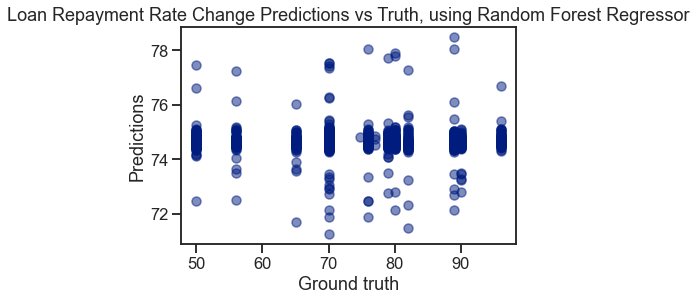

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Loan Repayment Rate Change Predictions vs Truth, using Random Forest Regressor');

In [40]:
#for x in actual_y_pred:
 #   RR = prob * (x/100) * 1000000
  #  print("Loan Repayment Risk: " + str((RR/1000000)*100) + " %")

In [41]:
loan_amount = input("Enter the Loan Amount to disburse ")

Enter the Loan Amount to disburse 1000000


In [42]:
loan_amount = float(loan_amount)

In [43]:
loan_amount

1000000.0

In [44]:
for x in actual_y_pred:
    RR = prob * (x/100) * loan_amount
    print("Transition probability between loan repayment states: "+ str(prob))
    print("The predicted loan repayment rate " + str(x) + " %")
    print("Loan Repayment Risk for the " + str(loan_amount) + " loan after " + str(loan_period)+ " months: " + str((RR/loan_amount)*100) + " %")

Transition probability between loan repayment states: 0.09774864000000001
The predicted loan repayment rate 74.90821772181856 %
Loan Repayment Risk for the 1000000.0 loan after 4 months: 7.322176407131662 %
